# Homework 3 - Question 2

### Guidance

On Question 2 we will intialize wine data along with its class labels.

## Part a) ##

In [1]:
import pandas as pd

# For information on the Wine dataset see:  https://archive.ics.uci.edu/dataset/109/wine

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Splitting the data into 70% training and 30% test subsets.



In [2]:
from sklearn.model_selection import train_test_split

#----------- Write your code here ------------------------------

X = df_wine.drop("Class label", axis=1)
# This code can be written like:
# X = df_wine.iloc[:, 1:].values

y = df_wine["Class label"]
# This code can be written like:
# y = df_wine.iloc[:, 0].values


# Separate dataset 0.7 training and 0.3 test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#---------------------------------------------------------------

Standardizing the data.

In [3]:
from sklearn.preprocessing import StandardScaler

#----------- Write your code here ------------------------------

scal = StandardScaler()
X_train_std = scal.fit_transform(X_train)
X_test_std = scal.transform(X_test)

#---------------------------------------------------------------

# PCA #

Find PCA transform using training data and print the explained variance ratios

## Part b) ##

In [4]:
from sklearn.decomposition import PCA

#----------- Write your code here ------------------------------

pca = PCA()

X_train_pca = pca.fit_transform(X_train_std)

explained_var = pca.explained_variance_
explained_var_rat = pca.explained_variance_ratio_

print(explained_var)
print(explained_var_rat)

#---------------------------------------------------------------

[4.74376552 2.45913372 1.5276711  0.99327678 0.92313257 0.59663887
 0.46974164 0.34681782 0.28504118 0.25665489 0.23096439 0.17349645
 0.09935613]
[0.36196226 0.18763862 0.11656548 0.07578973 0.07043753 0.04552517
 0.03584257 0.02646315 0.02174942 0.01958347 0.01762321 0.01323825
 0.00758114]


Total and explained variance ratios and the total variance explained

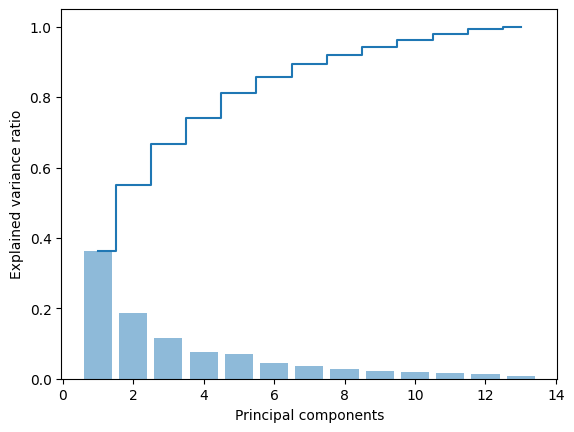

In [5]:
import matplotlib.pyplot as plt
import numpy as np

#----------- Write your code here ------------------------------

# I got plt.bar info from this source.
# https://ostwalprasad.github.io/machine-learning/PCA-using-python.html

plt.bar(range(1, len(explained_var_rat) + 1), explained_var_rat, alpha=0.5, align="center")
plt.step(range(1, len(explained_var_rat) + 1),
         explained_var_rat.cumsum(), where="mid")

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()
#---------------------------------------------------------------

## Part c) ##

Reduce dimensionality to 2 using PCA

In [6]:
#----------- Write your code here ------------------------------

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

explained_var_rat = pca.explained_variance_ratio_
print(explained_var_rat)
#---------------------------------------------------------------

[0.36196226 0.18763862]


Plot the projected data in 2D

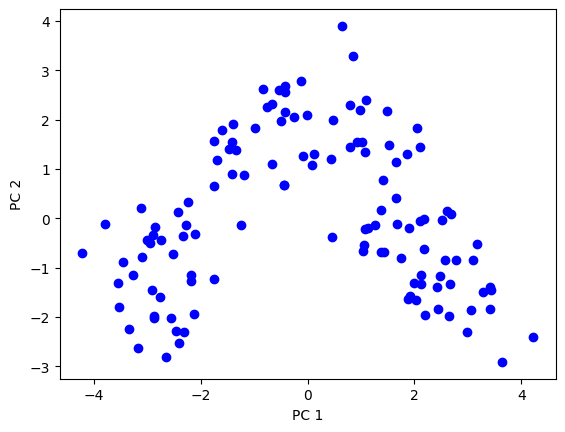

In [7]:
#----------- Write your code here ------------------------------

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = "blue")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

#---------------------------------------------------------------

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

## Part d) ##

Training logistic regression classifier using the first 2 principal components.

Print the accuracy on the training set

In [9]:
from sklearn.linear_model import LogisticRegression

#----------- Write your code here ------------------------------

lr = LogisticRegression()
lr.fit(X_train_pca, y_train)

acc = lr.score(X_train_pca, y_train)
print(f"Accuracy: {acc}")

# 0.9838709677419355

#---------------------------------------------------------------

Accuracy: 0.9596774193548387


Plot the decision regions

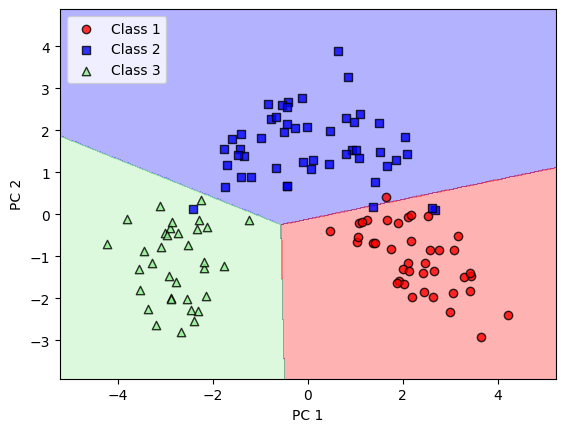

In [10]:
#----------- Write your code here ------------------------------

plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc="upper left", scatterpoints=1)
plt.show()

#---------------------------------------------------------------

## Part e) ##

Classify the test data and plot decision regions

Print the accuracy on the test set

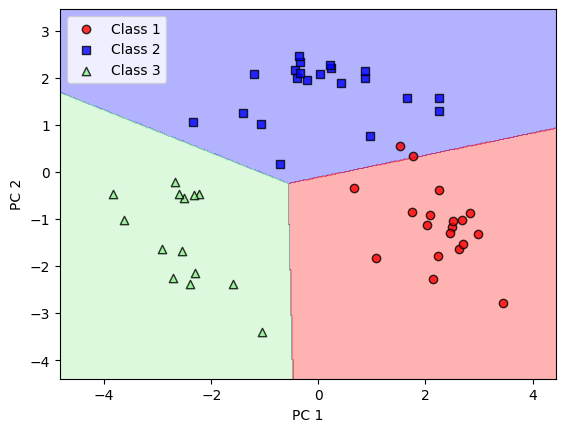

In [11]:
#----------- Write your code here ------------------------------

y_pred = lr.predict(X_test_pca)

plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc="upper left")
plt.show()

#----------------------------------------------------------------

<ipython-input-12-24018e409e5a>:4: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolor='black', marker='x', s=80, label='Test data')


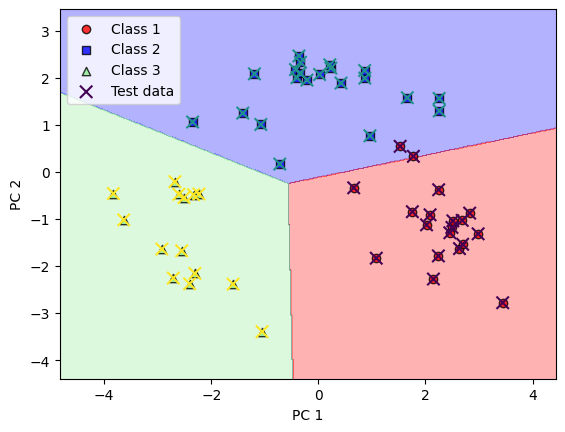

In [12]:
# Extra graph for understanding how accurately the classifier performs on the test data.

plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolor='black', marker='x', s=80, label='Test data')
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc="best")
plt.show()

# LDA #

## Part f) ##

Reduce the dimensionality to 2 using LDA

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#----------- Write your code here ------------------------------

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

#----------------------------------------------------------------

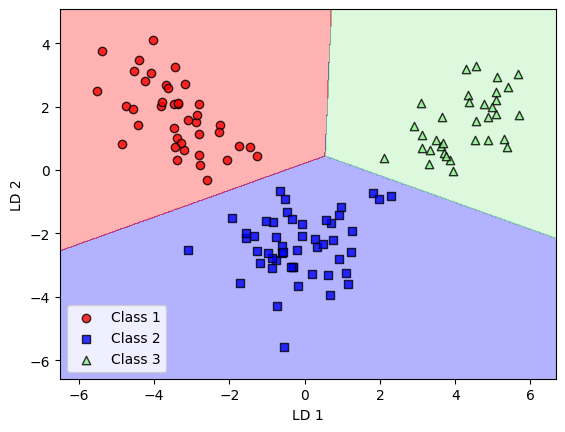

Accuracy on the training set: 1.0


In [19]:
from sklearn.linear_model import LogisticRegression

# Train a logistic regression classifier and report the accuracy on the training set
# Plot the decision regions
#----------- Write your code here ------------------------------

lr = LogisticRegression()
lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel("LD 1")
plt.ylabel("LD 2")
plt.legend(loc="best")
plt.show()

acc_train = lr.score(X_train_lda, y_train)
print(f"Accuracy on the training set: {acc_train}")

#----------------------------------------------------------------


Transform and classify the test data

Plot the decision regions

Print the accuracy on the test set

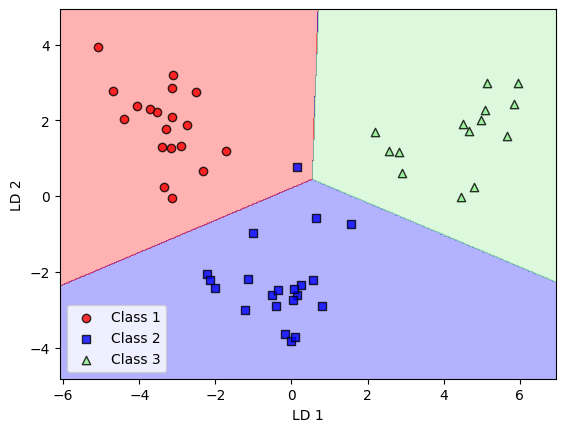

Accuracy on the test set: 0.9814814814814815


In [20]:
#----------- Write your code here ------------------------------

X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel("LD 1")
plt.ylabel("LD 2")
plt.legend(loc="best")
plt.show()

acc_test = lr.score(X_test_lda, y_test)
print(f"Accuracy on the test set: {acc_test}")

#----------------------------------------------------------------

## Part g) Comment on your the results using PCA and LDA ##

LDA (Linear discriminant analysis) method may perform better because it takes class information into account during dimensionality reduction, which can lead to more effective and better separation of the classes compared to PCA (Principal component analysis).

Overall, LDA might perform better for classification tasks where class separation is crucial, while PCA is more suitable for tasks like data visualization and noise reduction.

# t-NSE: Visualize the Wine dataset using t-SNE #

In [21]:
from sklearn.manifold import TSNE


#----------- Write your code here ------------------------------

tsne = TSNE(n_components=2, random_state=42)
X_train_std_tsne = tsne.fit_transform(X_train_std)

#----------------------------------------------------------------

Visualize the 2D data

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


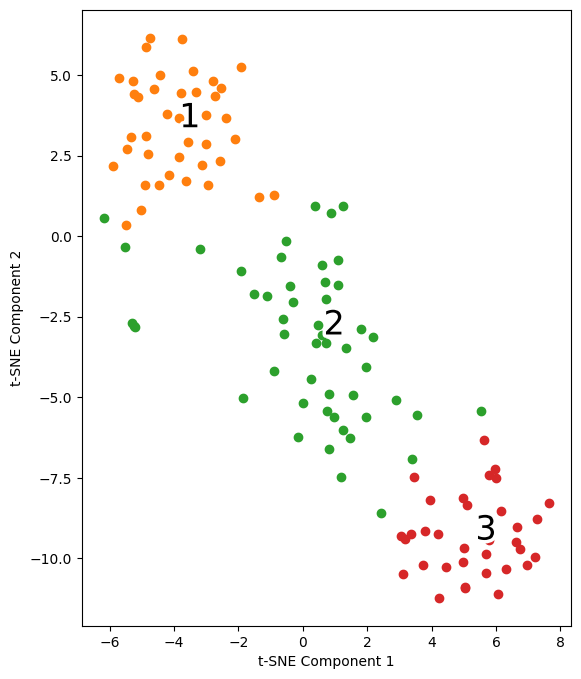

In [25]:
import matplotlib.patheffects as PathEffects


def plot_projection(x, colors):

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    for i in range(10):
        plt.scatter(x[colors == i, 0],
                    x[colors == i, 1])

    for i in range(10):

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])


#----------- Write your code here ------------------------------

plot_projection(X_train_std_tsne, y_train)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

#----------------------------------------------------------------